In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score, matthews_corrcoef
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline



In [57]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
df_raw.sample(10,random_state=2025)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
82,7,83,78,26,71,29.3,0.767,36,0
152,9,156,86,28,155,34.3,1.189,42,1
393,4,116,72,12,87,22.1,0.463,37,0
691,13,158,114,0,0,42.3,0.257,44,1
14,5,166,72,19,175,25.8,0.587,51,1
542,10,90,85,32,0,34.9,0.825,56,1
749,6,162,62,0,0,24.3,0.178,50,1
629,4,94,65,22,0,24.7,0.148,21,0
724,1,111,94,0,0,32.8,0.265,45,0
222,7,119,0,0,0,25.2,0.209,37,0


In [59]:
df_baking = df_raw.copy()  # Outcome Variable dependiente
df_baking.columns=df_baking.columns.str.lower()  # Todo a minuscula. Practica Recomendada.
df_baking["outcome"]=df_baking["outcome"].map({0:"No", 1:"Yes"}) # Diccionario para mapear
df_baking["outcome"]=df_baking["outcome"].astype("category") # Cambio de tipo de dato
df_baking=df_baking.replace(0,np.nan) #sustituyo 0 por nan
df=df_baking.copy()
df.info()

# glucose
# bloodpressure
# skinthickness
# insulin
# bmi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   pregnancies               657 non-null    float64 
 1   glucose                   763 non-null    float64 
 2   bloodpressure             733 non-null    float64 
 3   skinthickness             541 non-null    float64 
 4   insulin                   394 non-null    float64 
 5   bmi                       757 non-null    float64 
 6   diabetespedigreefunction  768 non-null    float64 
 7   age                       768 non-null    int64   
 8   outcome                   768 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 49.0 KB


In [60]:
# EDA
# Partimos Data
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df["outcome"], random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.15, stratify=df_train["outcome"], random_state=42)
df_train.shape, df_val.shape, df_test.shape


((521, 9), (93, 9), (154, 9))

In [61]:
display(df_train.describe(include="number").T)
display(df_train.describe(include="category").T)

# display funciona como print para jupyter

,count,mean,std,min,25%,50%,75%,max
pregnancies,447.0,4.375839,3.139099,1.000,2.000,4.000,6.000,14.000
glucose,517.0,121.493230,29.945986,56.000,99.000,117.000,140.000,198.000
bloodpressure,502.0,71.932271,12.524284,24.000,64.000,72.000,80.000,114.000
skinthickness,370.0,28.921622,10.803333,7.000,21.000,29.000,36.000,99.000
insulin,275.0,149.865455,108.507459,15.000,76.000,125.000,189.000,744.000
bmi,514.0,32.370428,6.923732,18.200,27.600,32.350,36.775,67.100
diabetespedigreefunction,521.0,0.477098,0.331311,0.084,0.247,0.388,0.631,2.329
age,521.0,33.053743,11.716892,21.000,24.000,29.000,40.000,81.000


,count,unique,top,freq
outcome,521,2,No,339


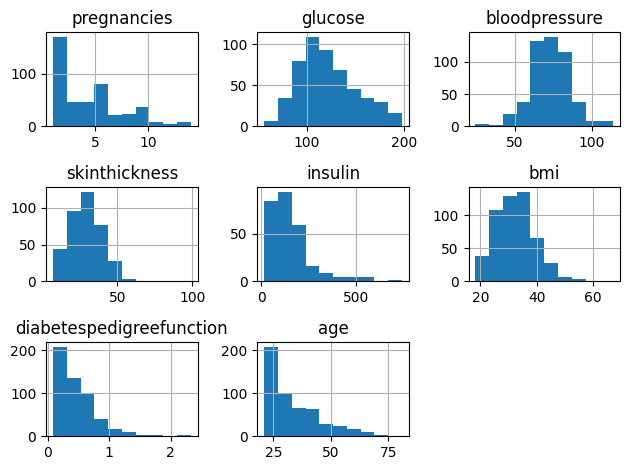

In [62]:
df_train.hist()
plt.tight_layout()
plt.show()

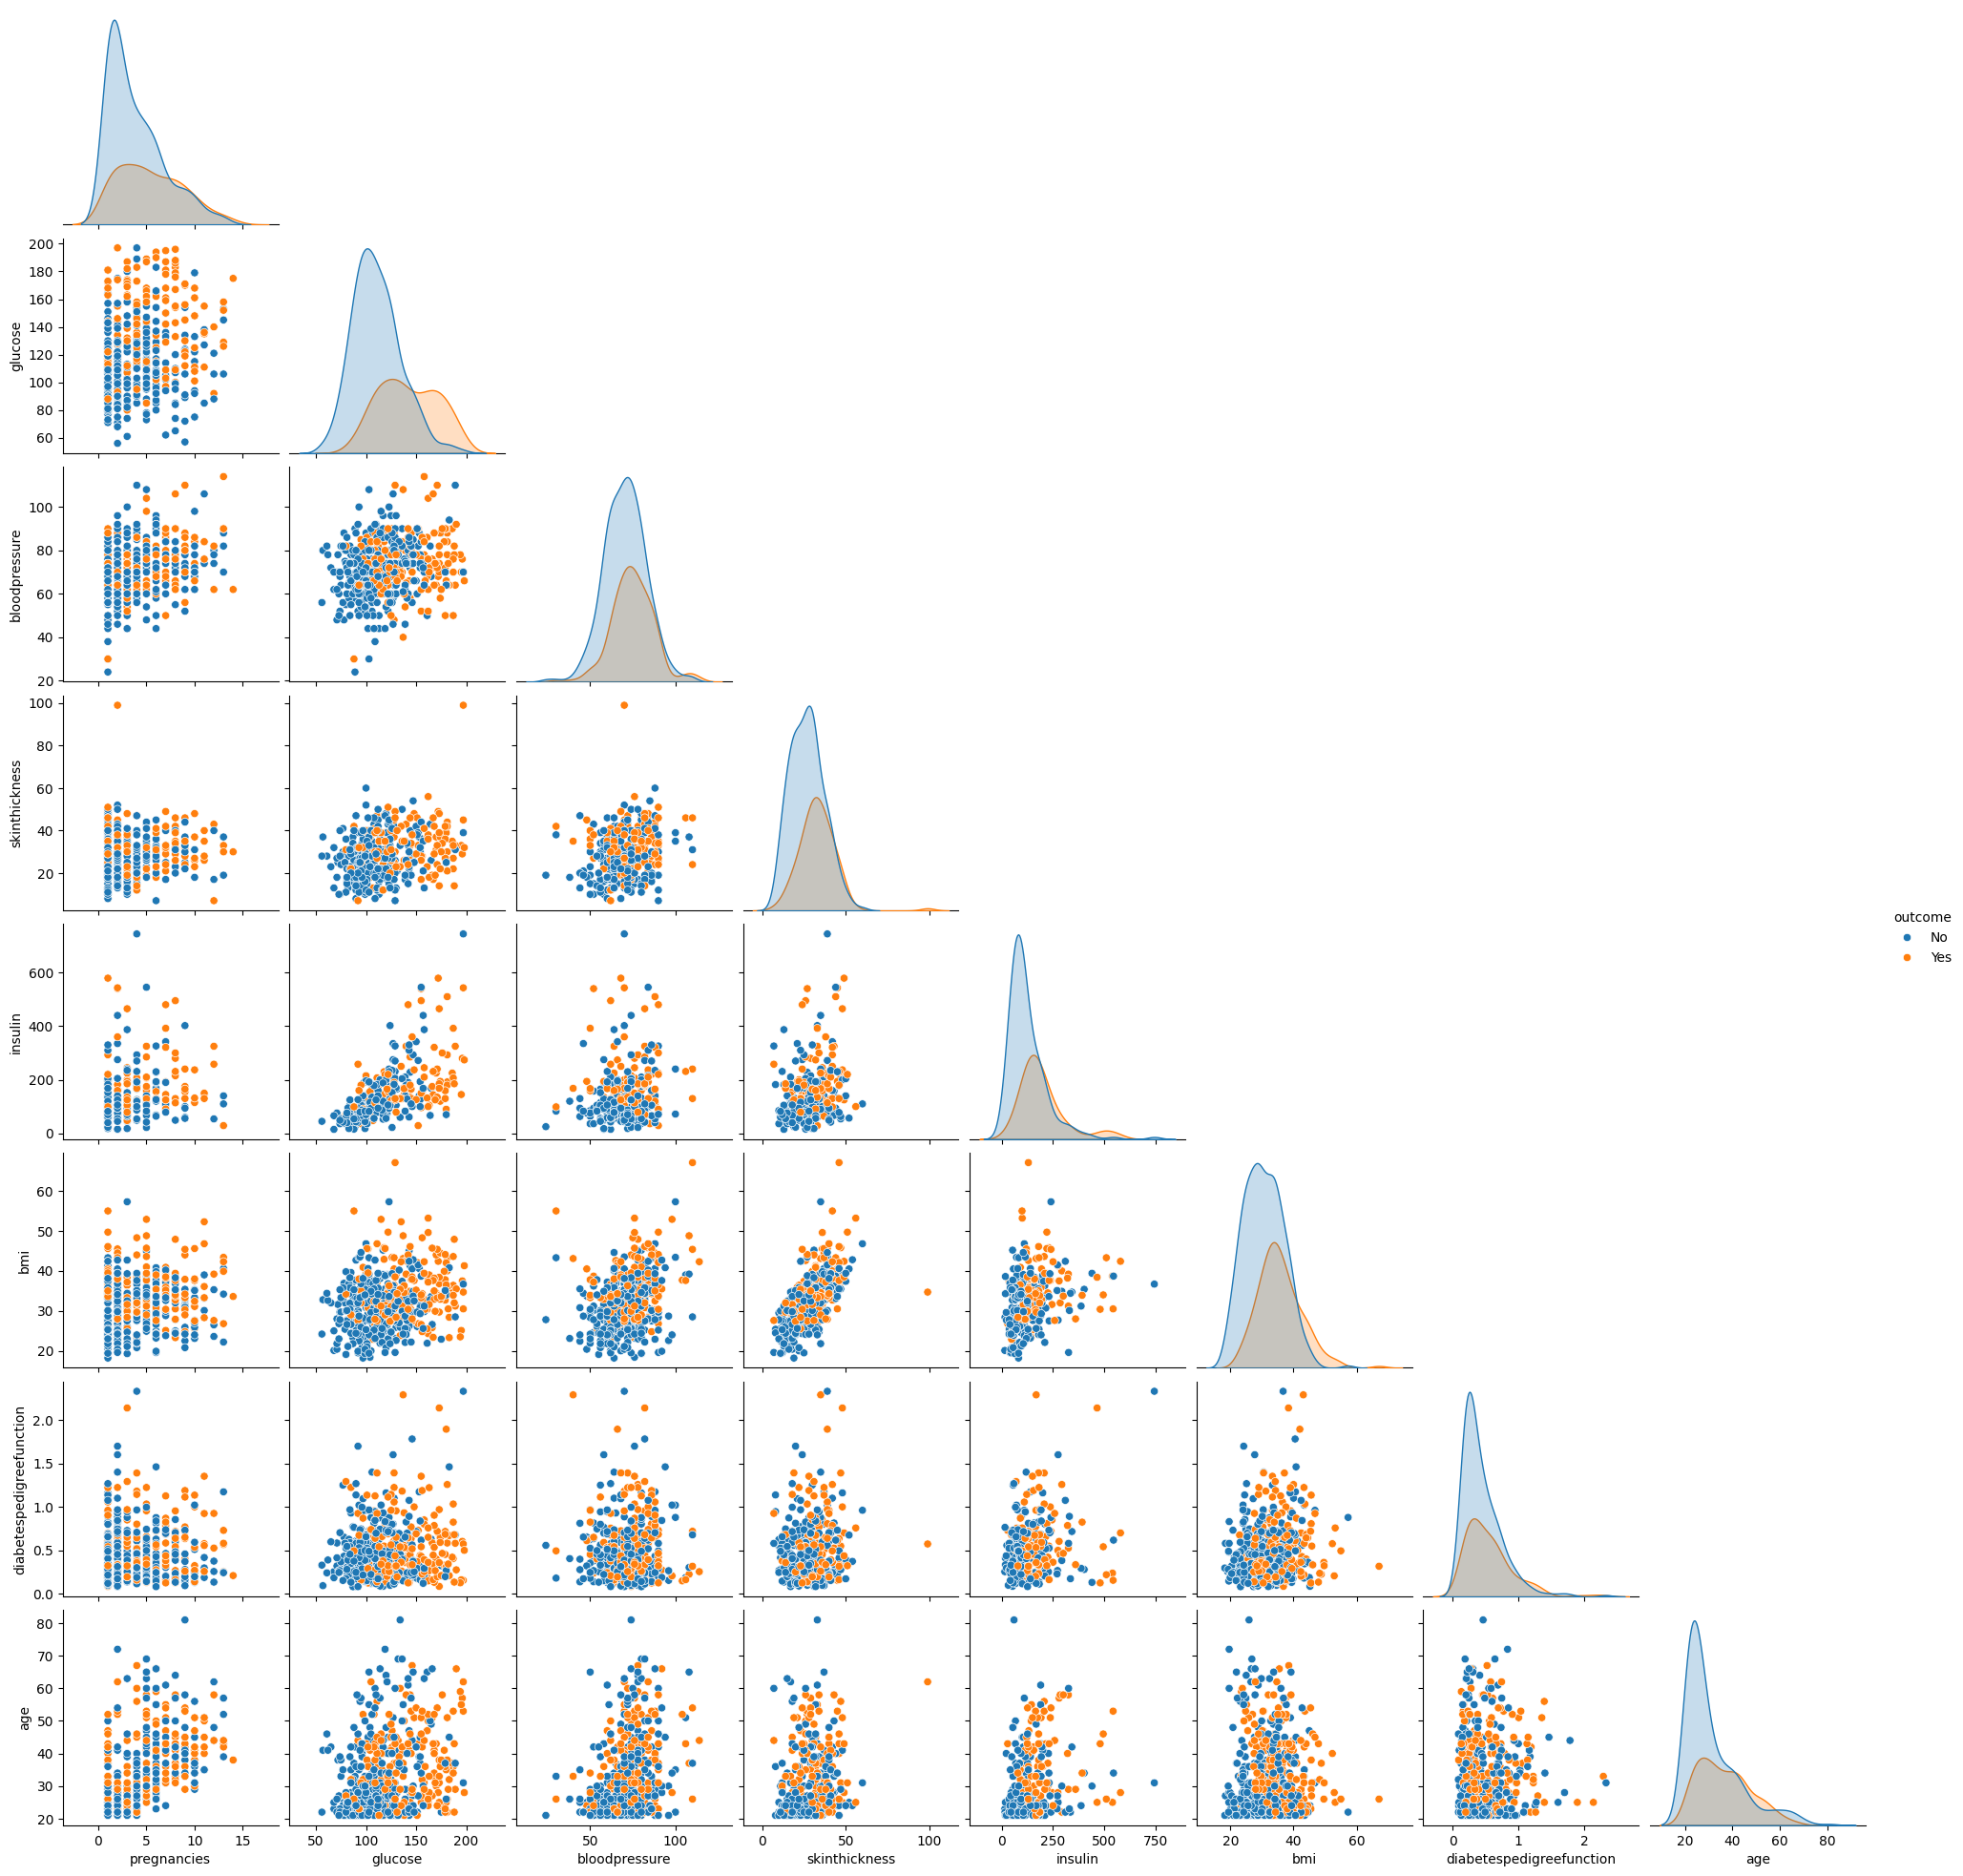

In [63]:
sns.pairplot(df_train, hue="outcome", corner=True)
plt.show()

In [64]:
X_train = df_train.drop(columns=["outcome"]) #matriz
y_train = df_train["outcome"] #vector pandas series
X_val = df_val.drop(columns=["outcome"])
y_val = df_val["outcome"]
X_test = df_test.drop(columns=["outcome"])
y_test = df_test["outcome"]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape  # Vector:Ultimo valor vacio

((521, 8), (521,), (93, 8), (93,), (154, 8), (154,))

In [65]:
label_encoder = LabelEncoder() # asigna valores a cada texto
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

In [66]:
clf_tree_p = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")), # imputa la media a los valores faltantes
    ("tree", DecisionTreeClassifier(class_weight="balanced")) # Algoritmo | como esta desbalanceado predice la clase mas frecuente, pero con class_weight le aplica ponderacion
])

In [67]:
clf_tree_p.fit(X_train, y_train_enc)
clf_tree_p.score(X_train, y_train_enc)

1.0

Accuracy: 0.6989247311827957
F1: 0.5757575757575758
mcc: 0.3431345137973534
              precision    recall  f1-score   support

          No       0.78      0.75      0.77        61
         Yes       0.56      0.59      0.58        32

    accuracy                           0.70        93
   macro avg       0.67      0.67      0.67        93
weighted avg       0.70      0.70      0.70        93



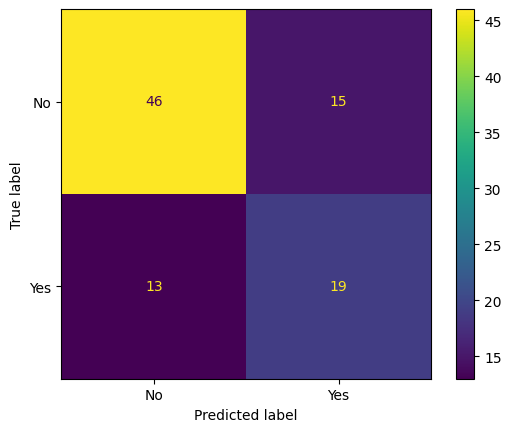

In [68]:
y_hat_val = clf_tree_p.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val_enc, y_hat_val)}")
print(f"F1: {f1_score(y_val_enc, y_hat_val)}")
print(f"mcc: {matthews_corrcoef(y_val_enc, y_hat_val)}")
print(classification_report(y_val_enc, y_hat_val, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_val_enc, y_hat_val, display_labels=label_encoder.classes_)
plt.show()

In [69]:
# recall es la proporcion de clases correctamente predecidas sobre el total de clases objetivo
# el recall se lee en filas
# la precision se lee en columnas

# Modelo de prediccion moderada.
# Vamos a buscar mejores parametros.

In [71]:
clf_tree_cv = GridSearchCV(
    estimator = clf_tree_p,
    param_grid = {
        "tree__max_depth": [2, 3, 4, 5, 6, 7],
        "tree__min_samples_leaf": [1,3,7,5,9],
        "tree__min_samples_split": [2,4,6,8,10],
        "tree__criterion": ["gini", "entropy"]
    },
    scoring = "f1",
    cv = 5
)

In [72]:
clf_tree_cv.fit(X_train, y_train_enc)
clf_tree_cv.best_params_

{'tree__criterion': 'gini',
 'tree__max_depth': 5,
 'tree__min_samples_leaf': 1,
 'tree__min_samples_split': 8}

Accuracy: 0.73
F1: 0.67
mcc: 0.46
              precision    recall  f1-score   support

          No       0.86      0.70      0.77        61
         Yes       0.58      0.78      0.67        32

    accuracy                           0.73        93
   macro avg       0.72      0.74      0.72        93
weighted avg       0.76      0.73      0.74        93



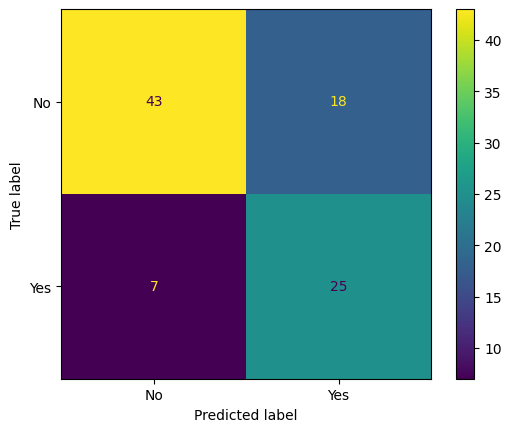

In [74]:
y_hat_val = clf_tree_cv.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val_enc, y_hat_val):.2f}")
print(f"F1: {f1_score(y_val_enc, y_hat_val):.2f}")
print(f"mcc: {matthews_corrcoef(y_val_enc, y_hat_val):.2f}")
print(classification_report(y_val_enc, y_hat_val, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_val_enc, y_hat_val, display_labels=label_encoder.classes_)
plt.show()

Accuracy: 0.74
F1: 0.68
mcc: 0.48
              precision    recall  f1-score   support

          No       0.87      0.71      0.78       100
         Yes       0.60      0.80      0.68        54

    accuracy                           0.74       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.74      0.75       154



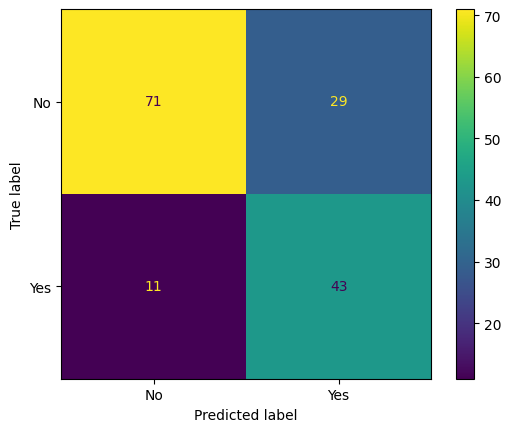

In [75]:
y_hat_test = clf_tree_cv.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test_enc, y_hat_test):.2f}")
print(f"F1: {f1_score(y_test_enc, y_hat_test):.2f}")
print(f"mcc: {matthews_corrcoef(y_test_enc, y_hat_test):.2f}")
print(classification_report(y_test_enc, y_hat_test, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_hat_test, display_labels=label_encoder.classes_)
plt.show()